In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import scipy.fftpack

## DTFT in loop form

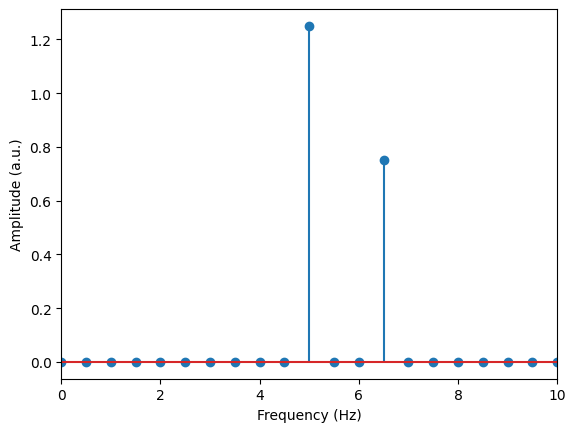

In [ ]:
# create a signal
s_rate = 1000 #Hz
time = np.arange(0.,2.,1./s_rate) # time vector in seconds
time_points = len(time) # number of time points
signal = 2.5*np.sin(2*np.pi*5*time) + 1.5*np.sin(2*np.pi*6.5*time)

#Fourier Transform
fourTime = np.array(range(time_points))/time_points #time points is normalized to 0-1.
f_coeff = np.zeros((len(signal)),dtype=complex)

for fi in range(time_points): #0 to 2000

    #create complex sine wave
    csw = np.exp(1j*2*np.pi*fi*fourTime)

    #complex dot product (returns Fourier Coeff)
    f_coeff[fi] = np.dot(signal,csw) / time_points #normalization ensures that the resulting Fourier coefficient
                                                   #represents the average contribution of the specific frequency to the input signal over the entire time duration.

amplitude = np.abs(f_coeff)

#compute frequency vector (N/2 + 1)
hz = np.linspace(0,s_rate/2,int(math.floor(time_points/2.)+1))#hz=[0, 0.5, 1, 1.5,...,499.5,500]


plt.stem(hz,amplitude[range(len(hz))])
plt.xlabel('Frequency (Hz)'), plt.ylabel('Amplitude (a.u.)')
plt.xlim(0,10)
plt.show()

In [ ]:
len(fourTime),len(time)

(2000, 2000)

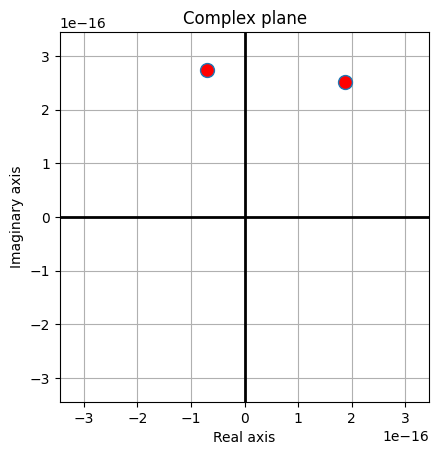

3.446272547923866e-16

In [ ]:
## Plot two Fourier coeff

coefs2plot = [0,0]
coefs2plot[0] = np.argmin(np.abs(hz-4))
coefs2plot[1] = np.argmin(np.abs(hz-4.5))

# extract mag and angle
mag = np.abs(f_coeff[coefs2plot])
phs = np.angle(f_coeff[coefs2plot])

# show the coeff in complex plane
plt.plot(np.real(f_coeff[coefs2plot]), np.imag(f_coeff[coefs2plot]),'o',
         linewidth=2, markersize = 10, markerfacecolor='r')

#make plot nicer
plt.plot([-2,2],[0,0],'k',linewidth=2)
plt.plot([0,0],[-2,2],'k',linewidth=2)
axislims = np.max(mag)*1.1
plt.grid()
plt.axis('square')
plt.xlim([-axislims, axislims])
plt.ylim([-axislims, axislims])
plt.xlabel('Real axis')
plt.ylabel('Imaginary axis')
plt.title('Complex plane')
plt.show()
axislims

## Converting indices to frequencies

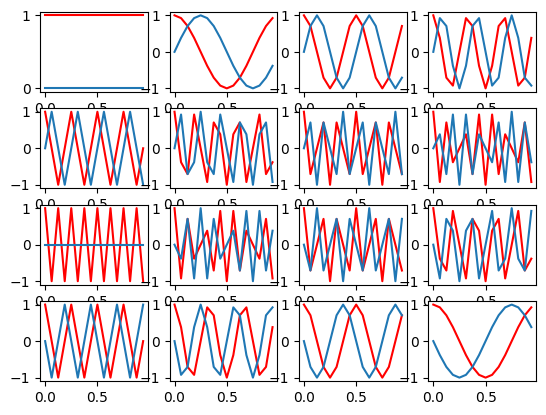

In [ ]:
time_points = 16
fourTime = np.array(range(time_points))/time_points

for fi in range(time_points):
    # create complex sine wave
    csw = np.exp(1j*2*np.pi*fi*fourTime)

    # plot
    loc = np.unravel_index(fi,[4,4],'F')
    plt.subplot2grid((4,4),(loc[1],loc[0]))
    plt.plot(fourTime,np.real(csw),'r')
    plt.plot(fourTime,np.imag(csw))


plt.show()

### Converting indices to frequencies, part 2

In [ ]:
s_rate = 1000
time_points = 1256001

# frequency vector
if time_points % 2 == 0: # even number
  topfreq = s_rate/2
else: # odd number
  topfreq = s_rate/2 *(time_points-1)/time_points

#method 1 (Ignore corrective factor)
hz1 = np.linspace(0, s_rate/2, np.floor(time_points/2+1).astype(int))

# method 2 (With corrective factor)
hz2 = np.linspace(0, topfreq, np.floor(time_points/2 + 1).astype(int))

# some arbitrary frequency to show
n = 16
print("%.9f\n%.9f" %(hz1[n],hz2[n]))

0.012738854
0.012738843


### Shortcut: Converting indices to frequencies

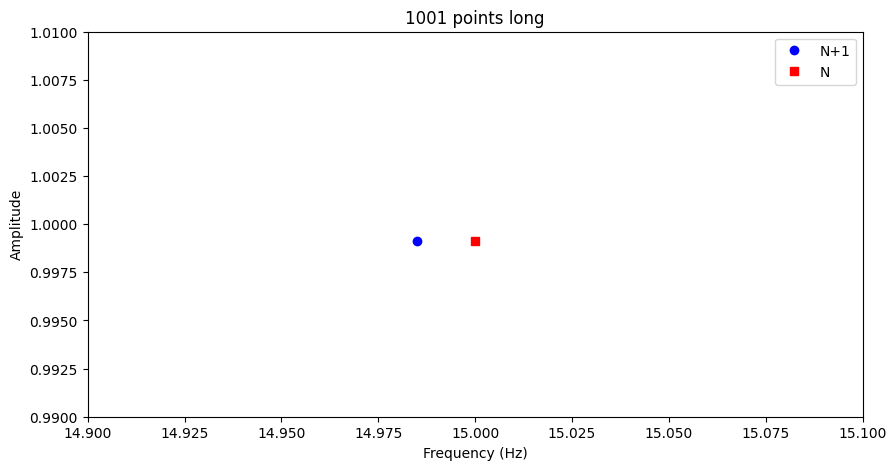

In [ ]:
## Case 1: ODD number of data points, N is correct

# Create a signal
s_rate = 1000
time = np.arange(0,s_rate+1)/s_rate # odd number
#time = np.arange(0,s_rate)/s_rate # even number

time_points = len(time)

signal = np.sin(2*np.pi*15*time)

#amplitude spectrum
signalX = 2*np.abs(scipy.fftpack.fft(signal)) / len(signal)

#frequencies vectors
hz1 = np.linspace(0,s_rate,time_points+1)
hz2 = np.linspace(0,s_rate,time_points)

#plot
fig = plt.subplots(1,figsize=(10,5))
plt.plot(hz1[:time_points],signalX,'bo',label='N+1')
plt.plot(hz2,signalX,'rs',label='N')
plt.xlim([14.9,15.1])
plt.ylim([.99,1.01])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title(str(len(time)) + ' points long')
plt.legend()
plt.show()



```
N time points are correct for odd number of data points
```



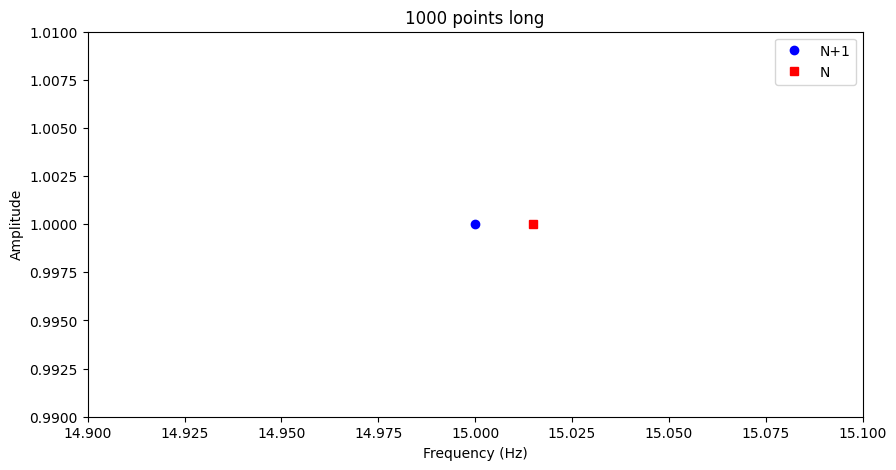

In [ ]:
## Case 2: EVEN number of data points, N+1 is correct

# create the signal
srate = 1000
time  = np.arange(0,srate)/srate
npnts = len(time)

# Notice: A simple 15-Hz sine wave!
signal = np.sin(15*2*np.pi*time)

# its amplitude spectrum
signalX = 2*np.abs(scipy.fftpack.fft(signal)) / len(signal)

# frequencies vectors
hz1 = np.linspace(0,srate,npnts+1)
hz2 = np.linspace(0,srate,npnts)


# plot it
fig = plt.subplots(1,figsize=(10,5))
plt.plot(hz1[:npnts],signalX,'bo',label='N+1')
plt.plot(hz2,signalX,'rs',label='N')
plt.xlim([14.9,15.1])
plt.ylim([.99,1.01])
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.title(str(len(time)) + ' points long')
plt.ylabel('Amplitude')
plt.show()



```
N+1 time points are correct for odd number of data points
```



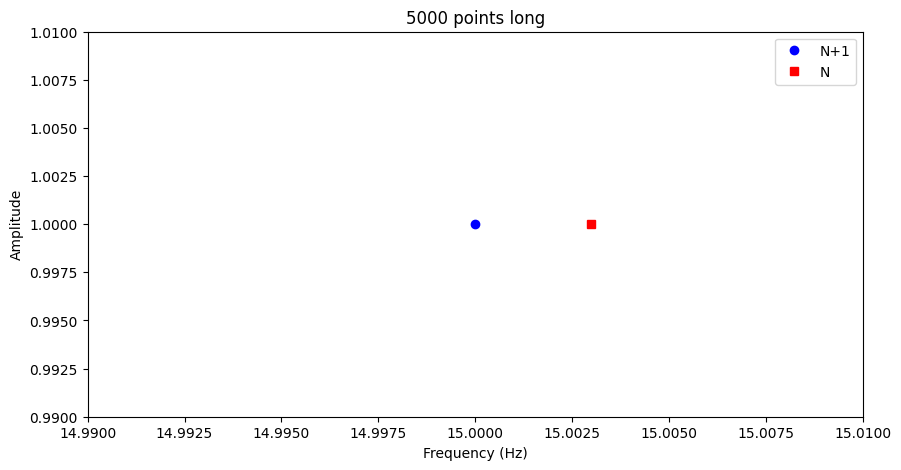

In [ ]:
## Case 3: longer signal

# create the signal
srate = 1000
time  = np.arange(0,5*srate)/srate # Frequency resolution depends on number of time points
npnts = len(time)

# Notice: A simple 15-Hz sine wave!
signal = np.sin(15*2*np.pi*time)

# its amplitude spectrum
signalX = 2*np.abs(scipy.fftpack.fft(signal)) / len(signal)

# frequencies vectors
hz1 = np.linspace(0,srate,npnts+1)
hz2 = np.linspace(0,srate,npnts)


# plot it
fig = plt.subplots(1,figsize=(10,5))
plt.plot(hz1[:npnts],signalX,'bo',label='N+1')
plt.plot(hz2,signalX,'rs',label='N')
plt.xlim([14.99,15.01])
plt.ylim([.99,1.01])
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.title(str(len(time)) + ' points long')
plt.ylabel('Amplitude')
plt.show()



```
N and N+1 data points give similar solution for long signals
```



## Normalized time vector

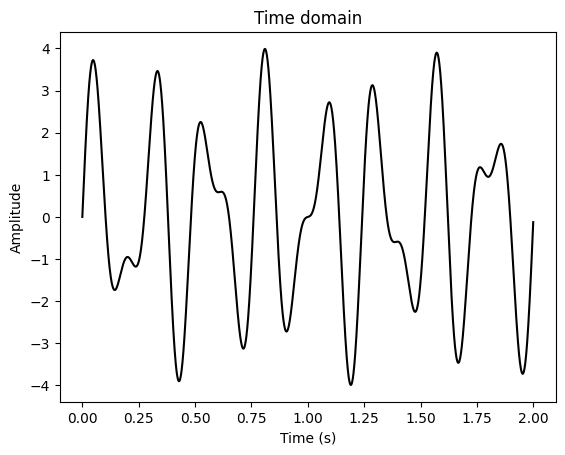

In [ ]:
# create the signal
srate  = 1000 # hz
time   = np.arange(0,2*srate)/srate # time vector in seconds
pnts   = len(time) # number of time points
signal = 2.5 * np.sin( 2*np.pi*4*time ) + \
         1.5 * np.sin( 2*np.pi*6.5*time )


# show the original signal
plt.plot(time,signal,'k')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Time domain')
plt.show()

In [ ]:
# prepare the Fourier transform
fourTime = np.arange(0,pnts)/pnts # time vector for csw
#fourTime = np.arange(100,pnts+100)/pnts #with this change you see aliasing

fCoefs = np.zeros(len(signal),dtype=complex)

for fi in range(pnts):
  csw = np.exp(-1j * 2*np.pi*fi*fourTime) # normalized time vector used to work for any data
  #fCoefs[fi] = sum(csw*signal)/pnts
  fCoefs[fi] = np.dot(csw,signal)/pnts


#extract amplitudes
ampls = 2*abs(fCoefs)

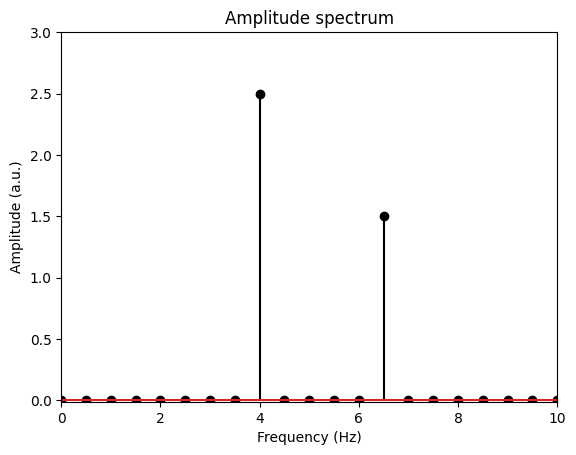

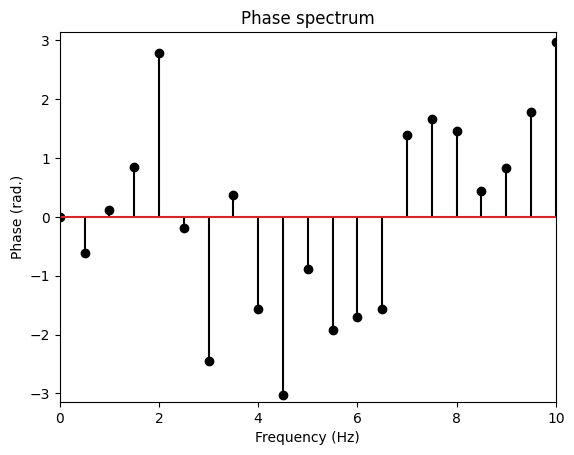

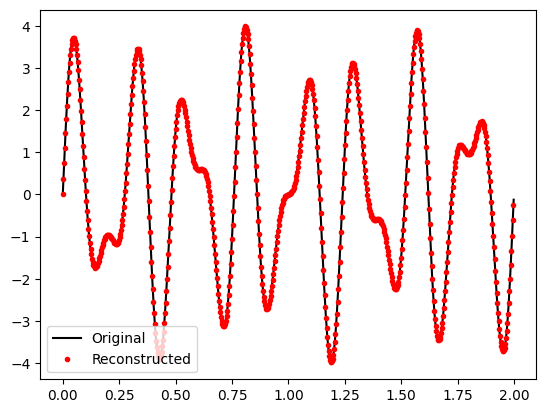

In [ ]:
# compute frequencies vector
hz = np.linspace(0,srate/2,int(np.floor(pnts/2)+1))

#plotAmplitude
plt.stem(hz,ampls[:len(hz)],'ks-')

# make plt look a bit nicer
plt.xlim([0,10])
plt.ylim([-.01,3])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (a.u.)')
plt.title('Amplitude spectrum')
plt.show()

# plot angles
plt.stem(hz, np.angle(fCoefs[:len(hz)]),'ks-')

plt.xlim([0,10])
plt.ylim([-np.pi,np.pi])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (rad.)')
plt.title('Phase spectrum')
plt.show()

# finally, plot reconstructed time series on top of original time series
reconTs = np.real(scipy.fftpack.ifft(fCoefs))*pnts

plt.plot(time,signal,'k',label='Original')
plt.plot(time[::3],reconTs[::3],'r.',label='Reconstructed')
plt.legend()
plt.show()

## Scaling Fourier coefficients

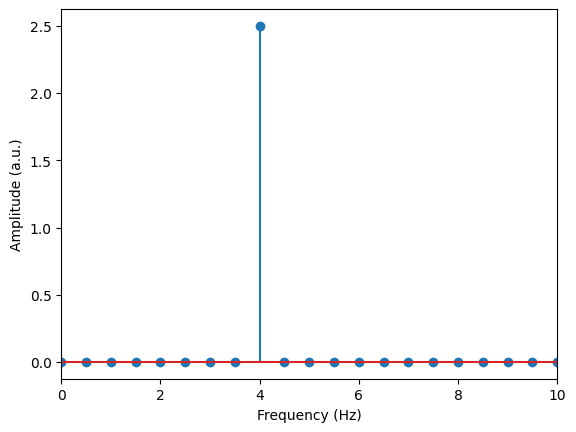

In [ ]:
s_rate = 1000
time = np.arange(0,2,1/s_rate)
time_points = len(time)
#signal
signal = 2.5*np.sin(2*np.pi*4*time)

#normalized fourier time vector
fourTime = np.array(range(time_points))/time_points
fCoefs = np.zeros(len(signal),dtype=complex)
for fi in range(time_points):
  csw = np.exp(-1j*2*np.pi*fi*fourTime)
  fCoefs[fi] = sum(signal*csw)/time_points #normalize garne because many dot product leads to large value

#amplitude
#ampls = np.abs(fCoefs) #wrong amplitude
ampls = 2 *  np.abs(fCoefs) # correct

# frequency vector
hz = np.linspace(0,s_rate/2,int(math.floor(time_points/2)+1))

plt.stem(hz,ampls[range(len(hz))])
plt.xlabel('Frequency (Hz)'), plt.ylabel('Amplitude (a.u.)')
plt.xlim(0,10)
plt.show()

## Phase values of Fourier coefficients

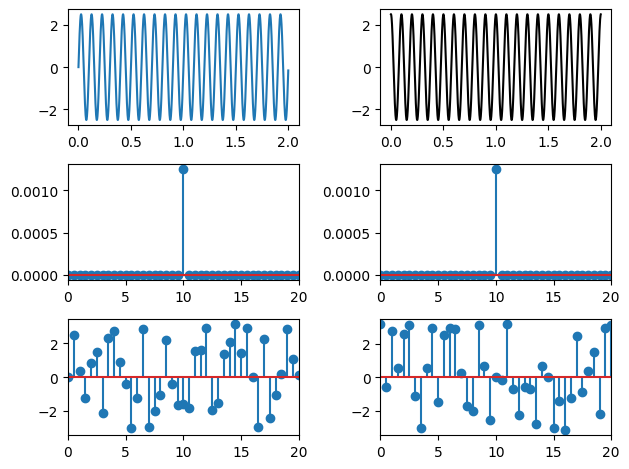

In [ ]:
## same amplitude, different phase

# simulation parameters
srate = 1000
time  = np.arange(0.,2.,1/srate)
npnts = len(time)

# generate signal
signal1 = 2.5*np.sin(2*np.pi*10*time +   0  ) # different phase values
signal2 = 2.5*np.sin(2*np.pi*10*time + np.pi/2 )


# prepare the Fourier transform
fourTime = np.array(range(npnts)) / npnts
signal1X = np.zeros((len(signal1)),dtype=complex)
signal2X = np.zeros((len(signal2)),dtype=complex)

for fi in range(npnts):

    # create complex sine wave
    csw = np.exp( -1j*2*np.pi*fi*fourTime )

    # compute dot product between sine wave and signal
    # these are called the Fourier coefficients
    signal1X[fi] = np.sum( np.multiply(signal1,csw) ) / npnts
    signal2X[fi] = np.sum( np.multiply(signal2,csw) ) / npnts


# frequencies vector
hz = np.linspace(0,srate/2,num=int(math.floor(npnts/2.)+1))

# extract correctly-normalized amplitude
signal1Amp = np.abs(signal1X[range(len(hz))]/npnts)
signal1Amp[1:] = 2*signal1Amp[1:]

signal2Amp = np.abs(signal2X[range(len(hz))]/npnts)
signal2Amp[1:] = 2*signal2Amp[1:]


# now extract phases
signal1phase = np.angle(signal1X[0:len(hz)])
signal2phase = np.angle(signal2X[0:len(hz)])


# plot time-domain signals
plt.subplot2grid((3,2),(0,0))
plt.plot(time,signal1)

plt.subplot2grid((3,2),(0,1))
plt.plot(time,signal2,'k')

plt.subplot2grid((3,2),(1,0))
plt.stem(hz,signal1Amp)
plt.xlim([0,20])

plt.subplot2grid((3,2),(1,1))
plt.stem(hz,signal2Amp)
plt.xlim([0,20])

plt.subplot2grid((3,2),(2,0))
plt.stem(hz,signal1phase)
plt.xlim([0,20])

plt.subplot2grid((3,2),(2,1))
plt.stem(hz,signal2phase)
plt.xlim([0,20])

plt.tight_layout()
plt.show()



```
same signal with same amplitude but with different phase
```



## Averaging Fourier coefficients

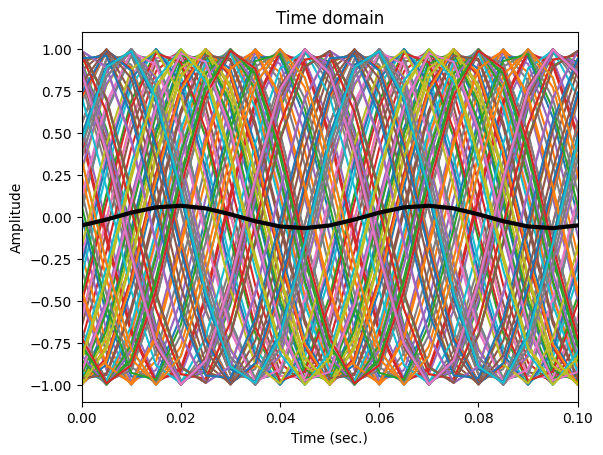

In [ ]:
# simulation parameters
ntrials = 100
srate = 200
time = np.arange(0,1,1/srate)
pnts = len(time)

#create dataset
data = np.zeros((ntrials,pnts))
for triali in range(ntrials):
    data[triali,:] = np.sin(2*np.pi*20*time + 2*np.pi*np.random.rand()) #random phase offset(0-2 pi)

# plot data
for i in range(ntrials):
  plt.plot(time,data[i,:])
plt.plot(time,np.mean(data,axis=0),'k',linewidth=3)
plt.xlabel('Time (sec.)')
plt.ylabel('Amplitude')
plt.title('Time domain')
plt.xlim([0,.1])
plt.show()

<ipython-input-126-1f87e79323c9>:12: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(hz, ave1[0:len(hz)],'ks-', label='Average coefficients', use_line_collection = True)
<ipython-input-126-1f87e79323c9>:13: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(hz+.2, ave2[0:len(hz)],'ro-', label='Average amplitude', use_line_collection = True)


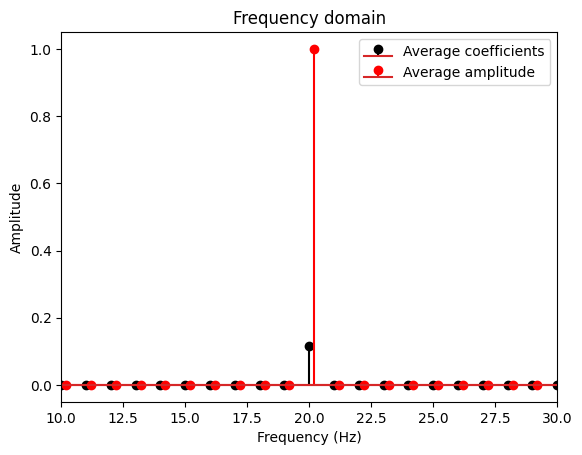

In [ ]:
# get fourier coeff
dataX = scipy.fftpack.fft(data,axis=1)/pnts
hz = np.linspace(0,srate/2,int(math.floor(pnts/2)+1))

#averaging option 1: Complex fourier coeff and then mag
ave1 = 2*np.abs(np.mean(dataX,axis=0))

#averaging option 2: magnitude, then complex fourier coefficients
ave2 = np.mean(2*np.abs(dataX),axis=0)

#plot both amplitude spectra
plt.stem(hz, ave1[0:len(hz)],'ks-', label='Average coefficients', use_line_collection = True)
plt.stem(hz+.2, ave2[0:len(hz)],'ro-', label='Average amplitude', use_line_collection = True)
plt.xlim([10,30])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency domain')
plt.legend()
plt.show()

## The DC coefficient

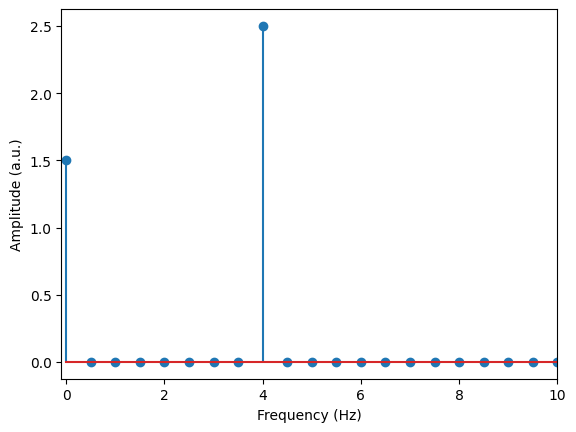

In [ ]:
## incorrect DC reconstruction without careful normalization

# create the signal
srate  = 1000 # hz
time   = np.arange(0.,2.,1/srate) # time vector in seconds
pnts   = len(time) # number of time points
signal =  1.5 + 2.5*np.sin( 2*np.pi*4*time ) #signal with global offset


# prepare the Fourier transform
fourTime = np.array(range(pnts))/pnts
fCoefs   = np.zeros(len(signal),dtype=complex)

for fi in range(pnts):
    # create complex sine wave and compute dot product with signal
    csw = np.exp( -1j*2*np.pi*fi*fourTime )
    fCoefs[fi] = np.sum( np.multiply(signal,csw) )


# extract amplitudes
#ampls = 2*np.abs(fCoefs/pnts); # incorrect
ampls = np.abs(fCoefs/pnts);
ampls[1:len(hz)] = 2*ampls[1:len(hz)] # dc component bahek lai matra multiply by 2

# compute frequencies vector
hz = np.linspace(0,srate/2,num=int(math.floor(pnts/2.)+1))

plt.stem(hz,ampls[0:len(hz)])
plt.xlim(-.1,10)
plt.xlabel('Frequency (Hz)'), plt.ylabel('Amplitude (a.u.)')
plt.show()

## Amplitude spectrum vs. power spectrum

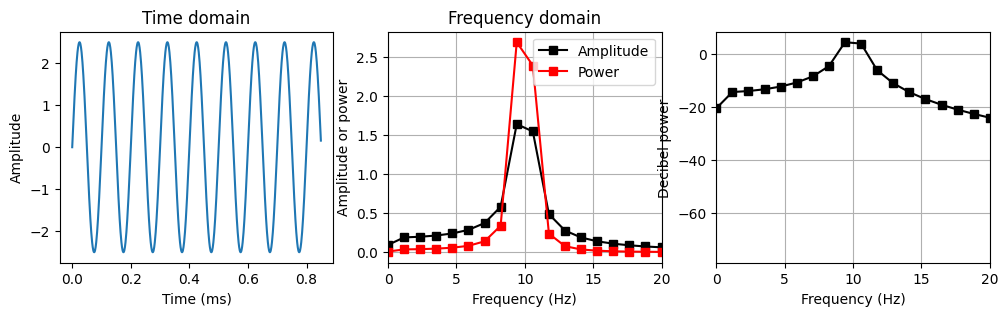

In [ ]:
srate = 1000
time = np.arange(0,.85,1/srate)
npts = len(time)

signal = 2.5*np.sin(2*np.pi*10*time)

#Fourier transform
signalX = scipy.fftpack.fft(signal)/npts
hz = np.linspace(0,srate/2,int(np.floor(len(time)/2)+1))

#extract correct normalized amplitude
signalAmp = np.abs(signalX[0:len(hz)])#take only half value
signalAmp[1:] = 2*signalAmp[1:]

#power
signalPow = signalAmp ** 2

plt.figure(figsize=(12,3))
# plot time-domain signal
plt.subplot2grid((1,3),(0,0))
plt.plot(time,signal)
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.title('Time domain')


# plot frequency domain spectra
plt.subplot2grid((1,3),(0,1))
plt.plot(hz,signalAmp,'ks-',label='Amplitude')
plt.plot(hz,signalPow,'rs-',label='Power')

plt.xlim([0,20])
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude or power')
plt.title('Frequency domain')
plt.grid()

# plot dB power
plt.subplot2grid((1,3),(0,2))
plt.plot(hz,10*np.log10(signalPow),'ks-')
plt.xlim([0,20])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Decibel power')
plt.grid()
plt.show()